In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [3]:
# Assumindo que: se tem promocao a loja esta aberta
for idx in dfteste[dfteste.isna().values]['Open'].index:
    dfteste['Open'][idx] = dfteste['Promo'][idx]

In [4]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: strToInt(x))
dfteste['StateHoliday'] = dfteste['StateHoliday'].apply(lambda x: strToInt(x))

In [5]:
dftreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
X = dftreino[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y = dftreino['Sales']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
predicao = lm.predict(X_test)
len(predicao)

254303

In [10]:
score = r2_score(y_test, predicao)
score

0.8532160114039068

In [11]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
dtpredict = dt.predict(X_test)

In [13]:
score = r2_score(y_test, dtpredict)
score

0.9563593598756296

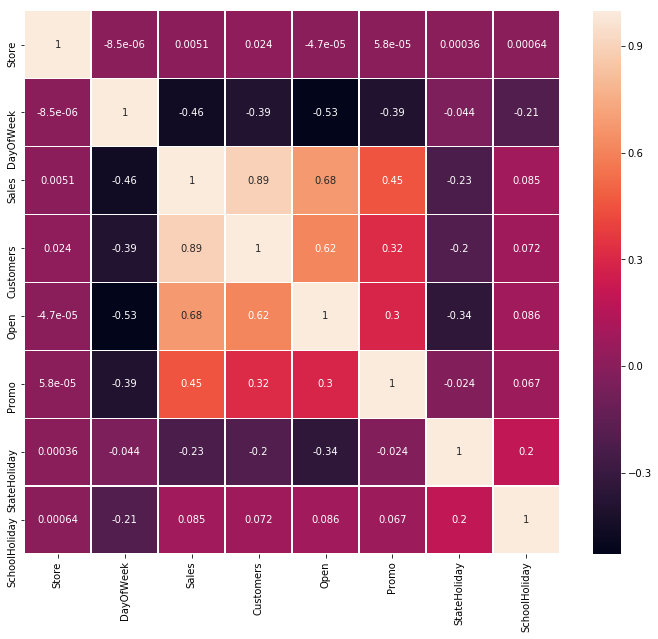

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dftreino.corr(), annot = True, linewidths=.5, ax=ax)

In [59]:
X2 = dftreino[['Store', 'Customers', 'Open', 'Promo', 'SchoolHoliday']]
y2 = dftreino['Sales']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25)

In [60]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
predicao2 = lm2.predict(X2_test)
score2 = r2_score(y2_test, predicao2)
score2

0.8519882628874141

In [ ]:
0.8520689450016132

In [61]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, y2_train)
dt2predict = dt2.predict(X2_test)
dtscore = r2_score(y2_test, dt2predict)
dtscore

0.9653302716946933

In [ ]:
0.8578647309816063

In [63]:
dfteste['Customers'] = dftreino['Customers'].mean()
XComp = dfteste[['Store', 'Customers', 'Open', 'Promo', 'SchoolHoliday']]
predictComp = dt2.predict(XComp)

In [64]:
dfPredito = pd.DataFrame(predictComp)
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.to_csv('decisiontree_customersmean.csv')